In [490]:
import numpy.matlib;
import numpy as np;
import networkx as nx;
import matplotlib.pyplot as plt;
import random
import copy

In [491]:
def Proper_coloring (M, q):
    M = M.tolist();
    options = [];
    for k in range(len(M)):
        options.append(list(range(q)));
    color_assignment = [0] * len(M);
    #print(color_set);
    #print(len(options[50]));
    #print(color_assignment);
    i = 0
    while i < len(M):
        #print("i = ", i);
        for j in range(i + 1):
            if (M[i][j] == 1) and (color_assignment[j] in options[i]):
                
                options[i].remove(color_assignment[j]);
                #print("conflict vertex = ",j);
            else:
                pass;
        #print("options of ", i,"are ", options[i]);
        color_assignment[i] = random.choice(options[i]);
        #print("color assignment: ", color_assignment);
        i += 1;
        
    return color_assignment

In [492]:
def Preference_Generator (M, q):
    X = [];
    for i in range(len(M)):
        X.append(np.random.permutation(q).tolist());
    X_preference = X.copy();

    return X_preference;

In [2]:
def isProper(A, L):
    isProper = 1;
    for i in range(len(A)):
        for j in range(i):
            if A[i][j] == 1:
                if L[i] == L[j]:
                    isProper = 0;
                    break;
                else:
                    pass;
            else:
                pass;
    return isProper

In [494]:
def RemoveVertex(A, x):
    while x < len(A) - 1:
        for i in range(len(A)):
            A[x][i] = A[x + 1][i];
        for j in range(len(A)):
            A[j][x] = A[j][x + 1];
        x = x + 1;
    
    A = A[:-1, :-1];
    return A;

In [3]:
def NetworkReduction(A_0, X_0, L_0):
    
    A = A_0.copy();
    X = X_0.copy();
    L = L_0.copy();
    
    count = 1;
    payoff = 0;
    avaicolorlist = [];
    
    for i in range(len(A)):
        
        index = X[i].index(L[i]);
        #index = idx[0][0];
        avaicolorlist.append((X[i][:index + 1]));
    
    #print(avaicolorlist);
    
    while count != 0:
    
        removelist = [];
    
        for i in range(len(A)):
            if avaicolorlist[i][0] == L[i]:
                #print("i =  ", i);
                #print("L[i] = ", L[i]);

                for j in range(i):
                    if A[i][j] == 1:
                        #print("j =  ", j);
                        #print(L[j]);
                        idx_j = np.where(avaicolorlist[j] == L[i])[0];
                        #print("neighbor's index:", idx_j)
                        avaicolorlist[j] = np.delete(avaicolorlist[j], idx_j);
                        #print("neighbor's available color", avaicolorlist[j]);
                    else:
                        pass;

                removelist.append(i);
            else:
                pass;
                
        removelist.reverse();
           
        #print("removelist: ", removelist);
            
        for k in removelist:
            
            payoff = payoff + q - 1 - X_0[k].index(L[k]);
            A = RemoveVertex(A, k);
            X.pop(k);
            del L[k];
            avaicolorlist.pop(k);
            
        #print(A);
        #print("X = ", X);
        #print("L = ", L);
        #print("avaicolorlist = ", avaicolorlist);
        
        count = 0;
            
        for m in range(len(A)):
            if avaicolorlist[m][0] == L[m]:
                count = count + 1; 
            else:
                pass;
        
        #print("count = ",count);
            
    return A, X, L, avaicolorlist, payoff;

In [4]:
def Metropolis(A, L_0, avaicolorlist, m):
    L = [0]*(m + 1);
    L[0] = L_0;
    C = avaicolorlist;
    n = len(A);
    for step in range(m):
        #print("L[step] = ", L[step]);
        X = L[step].copy();
        V_1 = random.choice(list(range(n)));
        #print("V_1 = ", V_1);
        V_2 = random.choice(C[V_1]);
        #print("V_2 = ", V_2);
        X[V_1] = V_2;
        #print("X = ", X);
        #print("L[step] = ", L[step]);
        q = 1/(n * len(C[V_1]));
        p = isProper(A, X) * q;
        #print("p = ", p);
        U = np.random.uniform(0, 1);
        #print("U = ", U);
        if U < p:
            L[step + 1] = X;
        else:
            L[step + 1] = L[step];
        #print("L[step + 1] = ", L[step + 1]);
        
    
    return L[m];

In [689]:
def Create_Network (n):
    
    G = nx.erdos_renyi_graph(n,0.3, seed = 1);
    degrees = [val for (node, val) in G.degree()];
    delta = max(degrees);
    A_0 = np.asarray(nx.to_numpy_matrix(G));
    A = A_0[:];
    print(degrees);
    print(delta);
    print(A);
    #print(nx.to_numpy_matrix(G));
    nx.draw(G, with_labels=True);
    plt.savefig('network.png', bbox_inches='tight');
    plt.show();
    
    return A_0, delta;

[6, 11, 3, 4, 5, 3, 4, 8, 10, 9, 10, 3, 6, 5, 5, 3, 5, 5, 6, 5]
11
[[0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

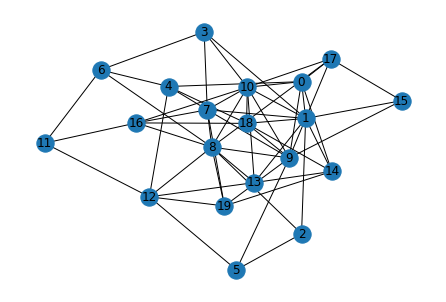

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 0., 0.],
       [1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
        0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
        1., 1., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 1.],
       [1., 1., 0., 1., 0., 0.

In [700]:
network = Create_Network(20);
A_0 = network[0];
A_0

In [701]:
### Number of colors
delta = network[1];
q = delta + 2;
q

13

In [702]:
### Generating Preference list
np.random.seed(10);
X_0 = Preference_Generator (A_0,q);
X_0
#preference = X.copy();
#preference

[[3, 7, 11, 6, 8, 2, 12, 5, 10, 1, 0, 4, 9],
 [5, 1, 7, 2, 11, 12, 9, 10, 0, 3, 4, 6, 8],
 [0, 11, 2, 10, 9, 12, 7, 5, 6, 3, 1, 4, 8],
 [10, 11, 8, 7, 0, 5, 2, 3, 4, 1, 9, 6, 12],
 [5, 4, 12, 10, 1, 3, 11, 7, 6, 0, 2, 9, 8],
 [1, 3, 7, 9, 2, 6, 11, 12, 5, 8, 0, 10, 4],
 [1, 7, 11, 4, 0, 3, 9, 2, 5, 10, 6, 12, 8],
 [7, 12, 3, 4, 11, 0, 5, 2, 10, 8, 1, 9, 6],
 [6, 8, 11, 1, 5, 10, 9, 12, 4, 0, 3, 7, 2],
 [4, 3, 5, 2, 6, 8, 7, 12, 11, 1, 10, 0, 9],
 [7, 6, 3, 2, 8, 4, 9, 11, 5, 10, 0, 12, 1],
 [4, 1, 12, 9, 8, 5, 7, 6, 11, 10, 3, 2, 0],
 [2, 9, 4, 0, 7, 12, 8, 10, 5, 6, 3, 1, 11],
 [2, 6, 12, 1, 3, 4, 0, 10, 11, 7, 5, 8, 9],
 [0, 2, 10, 11, 3, 8, 6, 7, 4, 12, 9, 5, 1],
 [5, 1, 10, 2, 12, 11, 7, 8, 4, 9, 3, 0, 6],
 [4, 8, 9, 0, 7, 5, 12, 3, 6, 11, 10, 1, 2],
 [3, 12, 5, 1, 7, 9, 11, 6, 8, 2, 10, 0, 4],
 [8, 9, 6, 10, 11, 4, 12, 7, 5, 3, 2, 1, 0],
 [7, 11, 8, 1, 9, 2, 10, 3, 0, 6, 12, 5, 4]]

In [703]:
### Generating initial proper coloring
random.seed(11);
L_0 = Proper_coloring (A_0, q);
L_0

[7, 9, 7, 7, 9, 10, 3, 2, 11, 12, 3, 1, 8, 5, 2, 1, 12, 0, 8, 9]

In [728]:
def welfare(A_0, X_0, L_0): 
    
    welfare = [0] * 1000;
    
    for k in range(1000):
        print("k = ", k);
        score = [0];
        score_curr = 0;
        new_network = NetworkReduction(A_0, X_0, L_0);
        #print(new_network[2]);

        while len(new_network[0]) > 1:

            A = new_network[0];
            #print("A: ", A);
            #print("tyoe of A: ", type(A));
            X = new_network[1];
            #print("X: ", len(X));
            #print("tyoe of X: ", type(X));
            L = new_network[2];
            #print("L: ", L)
            #print("tyoe of L: ", type(L));
            avaicolorlist = new_network[3];
            payoff = new_network[4];
            score_curr = score_curr + payoff;
            score.append(score_curr);
            #print("score = ", score);
            L_new = Metropolis(A, L, avaicolorlist, 1000);
            #print(L_new);
            #size = len(A);
            new_network = NetworkReduction(A, X, L_new);

        welfare[k] = score_curr;
    
    return welfare;

In [718]:
np.random.seed(0);
random.seed(0);
score = [0];
score_curr = 0;
new_network = NetworkReduction(A_0, X_0, L_0);
#print(new_network[2]);

while len(new_network[0]) > 1:

    A = new_network[0];
    #print("A: ", A);
    #print("tyoe of A: ", type(A));
    X = new_network[1];
    #print("X: ", len(X));
    #print("tyoe of X: ", type(X));
    L = new_network[2];
    #print("L: ", L)
    #print("tyoe of L: ", type(L));
    avaicolorlist = new_network[3];
    payoff = new_network[4];
    score_curr = score_curr + payoff;
    score.append(score_curr);
    #print("score = ", score);
    L_new = Metropolis(A, L, avaicolorlist, 1000);
    #print(L_new);
    #size = len(A);
    new_network = NetworkReduction(A, X, L_new);


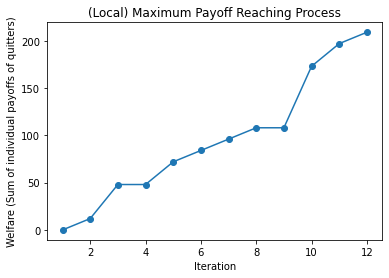

In [724]:
x_axis = list(range(1,len(score) + 1));
plt.plot(x_axis, score, '-o');
plt.xlabel("Iteration");
plt.ylabel("Welfare (Sum of individual payoffs of quitters)");
plt.title("(Local) Maximum Payoff Reaching Process")
plt.savefig('localmax.png', bbox_inches='tight');
plt.show()

In [725]:
score[-1]

209

In [729]:
welfare_sum = welfare(A_0, X_0, L_0)
welfare_sum

k =  0
k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20
k =  21
k =  22
k =  23
k =  24
k =  25
k =  26
k =  27
k =  28
k =  29
k =  30
k =  31
k =  32
k =  33
k =  34
k =  35
k =  36
k =  37
k =  38
k =  39
k =  40
k =  41
k =  42
k =  43
k =  44
k =  45
k =  46
k =  47
k =  48
k =  49
k =  50
k =  51
k =  52
k =  53
k =  54
k =  55
k =  56
k =  57
k =  58
k =  59
k =  60
k =  61
k =  62
k =  63
k =  64
k =  65
k =  66
k =  67
k =  68
k =  69
k =  70
k =  71
k =  72
k =  73
k =  74
k =  75
k =  76
k =  77
k =  78
k =  79
k =  80
k =  81
k =  82
k =  83
k =  84
k =  85
k =  86
k =  87
k =  88
k =  89
k =  90
k =  91
k =  92
k =  93
k =  94
k =  95
k =  96
k =  97
k =  98
k =  99
k =  100
k =  101
k =  102
k =  103
k =  104
k =  105
k =  106
k =  107
k =  108
k =  109
k =  110
k =  111
k =  112
k =  113
k =  114
k =  115
k =  116
k =  117
k =  118
k =  119
k =  120
k =  121
k =  122
k =

k =  923
k =  924
k =  925
k =  926
k =  927
k =  928
k =  929
k =  930
k =  931
k =  932
k =  933
k =  934
k =  935
k =  936
k =  937
k =  938
k =  939
k =  940
k =  941
k =  942
k =  943
k =  944
k =  945
k =  946
k =  947
k =  948
k =  949
k =  950
k =  951
k =  952
k =  953
k =  954
k =  955
k =  956
k =  957
k =  958
k =  959
k =  960
k =  961
k =  962
k =  963
k =  964
k =  965
k =  966
k =  967
k =  968
k =  969
k =  970
k =  971
k =  972
k =  973
k =  974
k =  975
k =  976
k =  977
k =  978
k =  979
k =  980
k =  981
k =  982
k =  983
k =  984
k =  985
k =  986
k =  987
k =  988
k =  989
k =  990
k =  991
k =  992
k =  993
k =  994
k =  995
k =  996
k =  997
k =  998
k =  999


[204,
 216,
 191,
 192,
 216,
 216,
 216,
 185,
 192,
 204,
 216,
 216,
 204,
 204,
 216,
 216,
 192,
 198,
 204,
 216,
 216,
 204,
 192,
 216,
 216,
 216,
 216,
 180,
 216,
 216,
 204,
 216,
 216,
 204,
 216,
 210,
 216,
 216,
 216,
 216,
 204,
 216,
 204,
 204,
 204,
 216,
 204,
 204,
 216,
 216,
 216,
 216,
 216,
 216,
 216,
 216,
 204,
 216,
 209,
 216,
 204,
 216,
 216,
 204,
 216,
 192,
 216,
 216,
 204,
 204,
 193,
 204,
 180,
 191,
 215,
 216,
 204,
 215,
 216,
 216,
 216,
 215,
 216,
 216,
 192,
 216,
 204,
 191,
 180,
 216,
 215,
 204,
 179,
 192,
 216,
 216,
 204,
 204,
 202,
 215,
 203,
 180,
 216,
 216,
 204,
 204,
 216,
 204,
 216,
 216,
 216,
 216,
 191,
 216,
 180,
 204,
 204,
 216,
 215,
 204,
 216,
 216,
 216,
 216,
 204,
 216,
 216,
 216,
 216,
 216,
 216,
 204,
 216,
 204,
 216,
 207,
 191,
 216,
 215,
 216,
 204,
 216,
 216,
 216,
 216,
 192,
 216,
 216,
 216,
 216,
 215,
 211,
 215,
 216,
 204,
 192,
 216,
 191,
 215,
 204,
 167,
 215,
 216,
 216,
 216,
 216,
 204

In [793]:
expect = sum(welfare_sum) / 1000;
expect

208.905

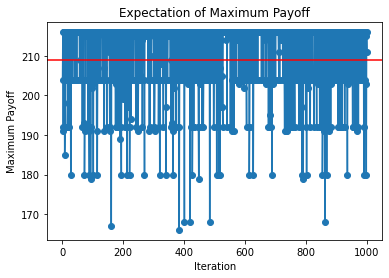

In [878]:
x_axis2 = list(range(1,len(welfare_sum) + 1));
plt.plot(x_axis2, welfare_sum, '-o');
plt.axhline(y=expect, color='r', linestyle='-')
plt.xlabel("Iteration");
plt.ylabel("Maximum Payoff");
plt.title("Expectation of Maximum Payoff");
plt.savefig('expectation.png', bbox_inches='tight');
plt.show()

In [794]:
max(welfare_sum)

216